Рассмотрим следующую задачу
$$
    \begin{cases}
    x_1 = 1 \\
    x_2 = 2x_1^{2} - 1 \\
    x_3 = 2x_2^{2} - 1 \\
    \vdots \\
    x_n = 2x_{n - 1}^2 - 1
    \end{cases}
$$
Известное решение для данной задачи: $(x_1 = 1, \cdots, x_n = 1)$. Сформулируем задачу оптимизации:
$$\text{min}\space\bigg[(x_1 - 1)^2 + \sum_{k = 1}^{n - 1}(x_{k + 1} - 2x_k^2 + 1)^2\bigg]$$ 
Необходимо применить метод градиентного спуска с постоянным шагом. Затем, шаг необходимо варьировать, сравнивая норму градиента и целевую функцию.

Известно, что 
$$
\text{grad} f(\left.x_{1}, x_{2}, \ldots, x_{n}\right)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(\left.x_{1}, x_{2}, \ldots, x_{n}\right)\\
\dfrac{\partial f}{\partial x_2}(\left.x_{1}, x_{2}, \ldots, x_{n}\right) \\
\vdots \\
\dfrac{\partial f}{\partial x_n}(\left.x_{1}, x_{2}, \ldots, x_{n}\right) 
\end{array}\right]
$$
Вычислим градиент по определению, расписав сумму и рассчитав соответствующие производные почленно. 

$$

f(\left.x_{1}, x_{2}, \ldots, x_{n}\right) = (x_1 - 1)^2 + (x_2 - 2x_1^2 + 1)^2 + \cdots + (x_n - 2x_{n-1}^{2} + 1)^2 \\
\text{grad} f(\left.x_{1}, x_{2}, \ldots, x_{n}\right) = 

\left[\begin{array} \\
2x_1 - 2 + 16x_1^3 - 8x_1x_2 - 8x_1 \\
2x_2 + 2 - 4x_1^2 + 16x_2^3 - 8x_2x_3 - 8x_2 \\
\vdots \\
2x_n + 2 - 4x_{n - 1}^2
\end{array}\right]

$$

Сам градиентный спуск 

In [144]:
import math
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

n = 10

def function_builder(x):
    n = len(x)
    # Get the first term of the summation.
    head = math.pow(x[0] - 1, 2)
    tail = []
    # Proceed to append the rest of the terms.
    for i in range(n - 1):
        term = (x[i + 1] - 2 * math.pow(x[i], 2) + 1) ** 2
        tail.append(term)
    # Calculate the first term and sum the rest (as stated in the beginning).
    return head + sum(tail)

# Same as in function_builder(...).
def gradient_builder(x):
    n = len(x)
    head = 2 * x[0] - 2 + 16 * math.pow(x[0], 3) - (8 * x[0] * x[1]) - (8 * x[0])
    rest = []
    for i in range(1, n - 1):
        term = 2  * x[i] + 2              - \
               4  * math.pow(x[i - 1], 2) + \
               16 * math.pow(x[i], 3)     - \
               8  * x[i] * x[i + 1]       - \
               8  * x[i]
        rest.append(term)
    tail = 2 * x[n - 1] + 2 - 4 * pow(x[n - 2], 2) 
    return [head] + rest + [tail]

assert(gradient_builder([1] * n) == [0.0] * n)

In [1]:
h = [0.0001, 0.001, 0.01]
initial_solution = [-1] + [1] * (n - 1) # (-1, 1, ..., 1)
calculation_threshold = 0.001
iterations = 1000

# Used for plotting.
def gradient_descent(x, h, iterations = iterations, verbose = True):

    x = np.array(x)
    objective = []
    gradient_norm = []

    for iteration in range(iterations):

        # The step of descent implies the calculation of the gradient.
        gradient = np.array(gradient_builder(x))
        x = x - h * gradient

        # Plug the new solution into the function builder.
        actual = function_builder(x)
        objective.append(actual)
        gradient_norm.append(np.linalg.norm(gradient))

        if verbose:
            clear_output(wait = True)
            print("iteration: {} \n x: {} \n f(x): {}".format(iteration, x, actual), flush = True)

        # If our minimization function is close enough to the calculation threshold, stop.
        if (actual <= calculation_threshold):
            break

    return x, objective, gradient_norm

dummy = gradient_descent([0] + [1] * 9, h[0], iterations = 1000, verbose = True)

NameError: name 'n' is not defined

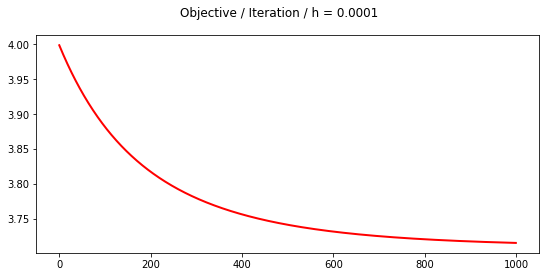

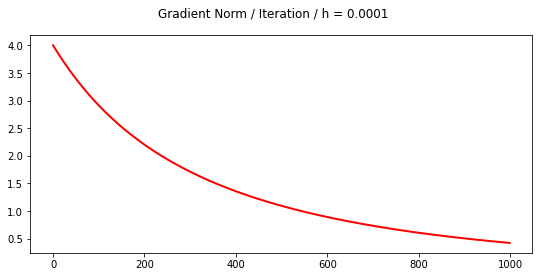

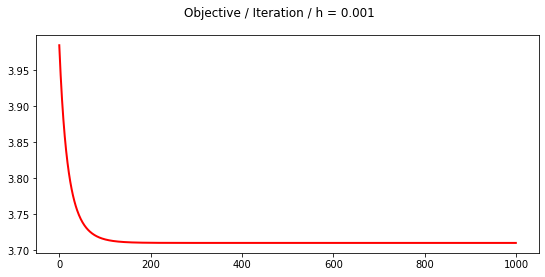

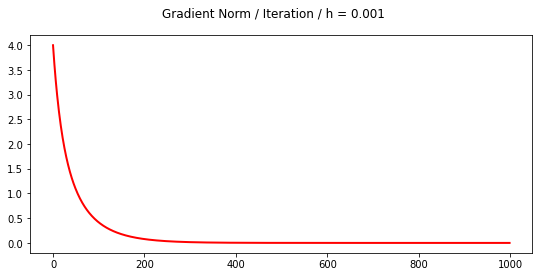

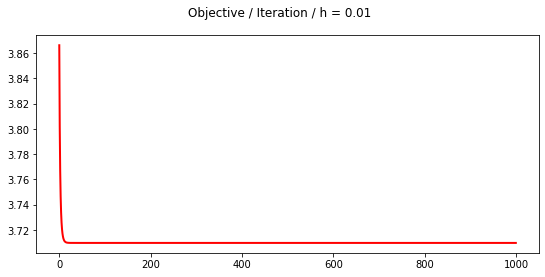

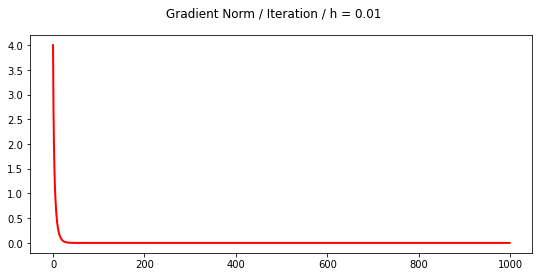

In [142]:
def plot_helper(y, suptitle):
    plt.figure(figsize = (9, 4))
    span = range(0, len(y))
    plt.suptitle(suptitle)
    plt.plot(span, y, color = 'red', linewidth = 2.0)

# Exploding gradient @ h = 0.1!

for step in h:
    solution, objective, gradient_norm = gradient_descent(
        initial_solution,
        step, 
        iterations = 1000, 
        verbose = False
    )
    plot_helper(objective,     "Objective / Iteration / h = "     + str(step))
    plot_helper(gradient_norm, "Gradient Norm / Iteration / h = " + str(step)) 